In [2]:
#http://old.apmath.spbu.ru/ru/structure/depts/is/task6-2013.pdf
%matplotlib inline
import math as m
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

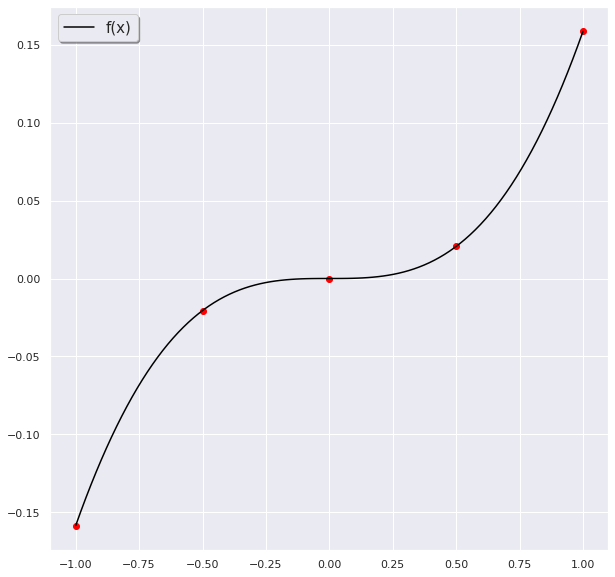

In [4]:
n = 5 #количество узлов
degree = 3 #степень

def f(x):
    return x - np.sin(x)

a = -1
b = 1
z = (b - a)/n

x_dots = np.linspace(a, b, num = 100)
y = f(x_dots)

even_x = np.linspace(a, b, n)
even_y = f(even_x)

fig, ax = plt.subplots()
ax.scatter(even_x, even_y, c = 'red')
ax.plot(x_dots, y, c = 'black', label = 'f(x)')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(10, 10)

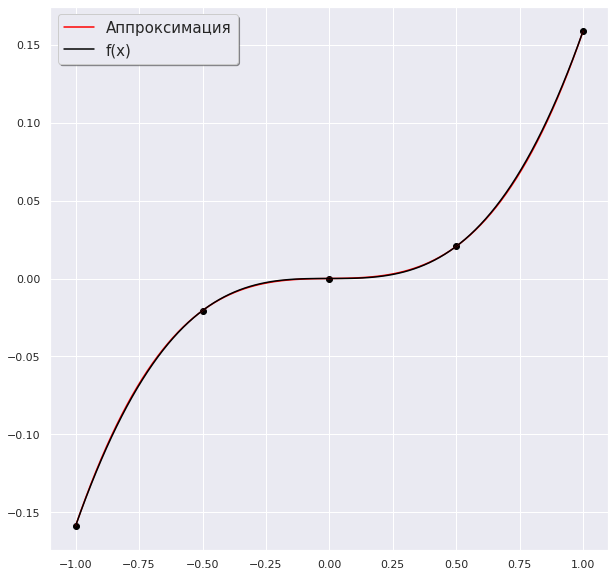

In [10]:
#Метод наименьших квадратов (МНК)
Q = np.vander(even_x, degree + 1, increasing = True) #создание матрицы Вандермонда
H = np.matmul(Q.T, Q)
b = np.matmul(Q.T, even_y)
a = linalg.solve(H, b)

#вычисление полиномиальных слагаемых в обобщенном полиноме, для которого 
#среднеквадратичное отклонение минимально, т.е. полиноме наилучшего среднеквадратичного приближения.
def polynomial(x, coefs, k): 
    result = 0
    j = 0
    for i in coefs:
        result += (x**j)*i
        j+=1
    return result
polynomial_y = [polynomial(i, a, degree) for i in x_dots] 

fig, ax = plt.subplots()
ax.plot(x_dots, polynomial_y,c = 'red', label = 'Аппроксимация')
ax.plot(x_dots, y, c = 'black', label = 'f(x)')
ax.scatter(even_x, even_y, c = 'black')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(10, 10)

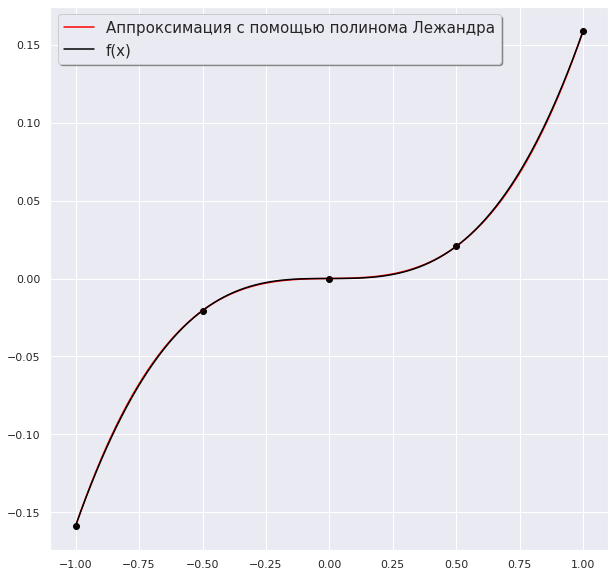

In [17]:
def q_i(x, i): #https://kpfu.ru/staff_files/F1947724999/ChMA.pdf стр. 63???
    if i == 0:
        return 1
    elif i == 1: 
        sum = np.sum(even_x)
        return x - 1/n*(sum)
    else: 
        num_a, den_a, num_b, den_b = 0, 0, 0, 0
        for x_i in even_x:
            num_a += x_i*(q_i(x_i, i-1)**2)
            den_a += q_i(x_i, i-1)**2
            num_b += x_i*q_i(x_i, i-1)*q_i(x_i, i-2)
            den_b += q_i(x_i, i-2)**2
            
        alpha_j_1 = num_a/den_a
        betta_j = num_b/den_b
        
        return (x - alpha_j_1)*q_i(x, i-1) - betta_j*q_i(x,i-2)

a_q = np.array([])
num_a_q, den_a_q = 0, 0

for k in range(0, degree + 1):
    for x in even_x:
        num_a_q += q_i(x, k)*f(x)
        den_a_q += q_i(x, k)**2
    a_q = np.append(a_q, num_a_q/den_a_q)
    num_a_q, den_a_q = 0, 0

def q_polynomial(x, coefs, degree):
    result = 0
    for k in range(0, degree + 1):
        result += a_q[k]*q_i(x, k)
    return result
q_polynomial_y = [q_polynomial(x, a_q, degree) for x in x_dots]

fig, ax = plt.subplots()
ax.scatter(even_x, even_y, c = 'black')
ax.plot(x_dots, q_polynomial_y, c = 'red', label = 'Аппроксимация с помощью полинома Лежандра')
ax.plot(x_dots, y, c = 'black', label = 'f(x)')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(10, 10)